In [22]:
%matplotlib inline
# %matplotlib notebook

import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# ścieżki do plików
f_o2022 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2022.gpkg"
f_o2021 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2021.gpkg"
f_o2020 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2020.gpkg"
f_o2019 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2019.gpkg"
f_o2018 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2018.gpkg"

f_bdot = r"C:\SEM6\SISS\metadata\bdot\sk_bdot_wfs.gpkg"  # UWAGA: w celu uzyskania najświeższych danych o bdocie, plik ten należy wygenerować ponownie (i tak nic to nie da...)

# ORTO

In [24]:
# dictionary, aby móc łatwo się odwoływać do dataframeów
orto = {
2022: gpd.read_file(f_o2022),
2021: gpd.read_file(f_o2021),
2020: gpd.read_file(f_o2020),
2019: gpd.read_file(f_o2019),
2018: gpd.read_file(f_o2018),
}

for year in orto.keys():
    # pozbycie się niepotrzebnych kolumn
    orto[year].drop(columns=['gml_id','nr_zglosz', 'akt_rok', 'zrodlo_danych'], inplace=True)
    # zamiana typu daty zrobienia zdjęcia (?) na datetime
    orto[year]['timePosition'] = pd.to_datetime(orto[year]['timePosition'])

In [25]:
# robię testy dla wybranego roku. Przerobione: 2022...
wybrany_df = orto[2022]

In [26]:
# wyświetlenie jakie dane mamy
wybrany_df.tail(3)

,godlo,piksel,kolor,uklad_xy,modul_archiwizacji,timePosition,czy_ark_wypelniony,url_do_pobrania,wlk_pliku_MB,geometry
65519,N-34-107-B-b-4-4,0.25,RGB,PL-1992,1:5000,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,54,"POLYGON ((797880.230 609366.310, 797843.980 60..."
65520,N-34-108-A-a-3-4,0.25,RGB,PL-1992,1:5000,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,55,"POLYGON ((802043.930 609628.930, 802007.160 61..."
65521,N-34-107-B-c-4-1,0.25,CIR,PL-1992,1:5000,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,58,"POLYGON ((787890.120 601780.560, 787855.170 60..."


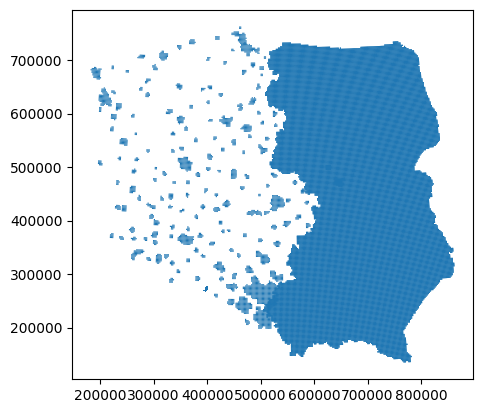

In [27]:
# wizualizacja poligonów reprezentujących arkusze ortofotomapy
wybrany_df.plot()
plt.show()

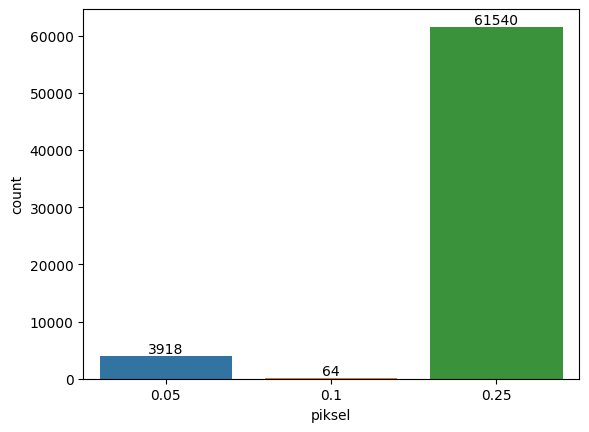

In [28]:
# GSD counts
ax = sns.countplot(x=wybrany_df['piksel'])
ax.bar_label(ax.containers[0])
plt.show()

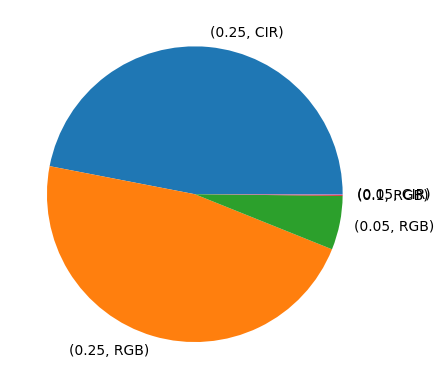

In [29]:
# GSD a kolor
wybrany_df[['piksel', 'kolor']].value_counts(['piksel', 'kolor']).plot(kind='pie')
plt.show()

# BDOT

In [30]:
# wczytanie pliku gpkg z informacją o aktualności bdota w powiatach (i tak nie wiadomo co to znaczy - ta ich data_aktualizacji)
bdot = gpd.read_file(f_bdot)

# zamiana typu daty aktualizacji (czego?) na datetime
bdot['Data_aktualizacji'] = pd.to_datetime(bdot['Data_aktualizacji'])

# wyświetlenie jakie dane mamy
bdot.tail(3)

,TERYT,NAZWA_POWIATU,Data_aktualizacji,URL_GML,URL_SHP,geometry
377,0413,powiat sępoleński,2022-10-27,https://opendata.geoportal.gov.pl/bdot10k/04/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((384997.245 615178.269, 384988.598 61..."
378,3019,powiat pilski,2022-12-08,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((342585.530 579834.380, 342574.517 57..."
379,1007,powiat opoczyński,2023-03-06,https://opendata.geoportal.gov.pl/bdot10k/10/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((567254.789 396468.679, 567047...."


In [31]:
# mamy 10 par powiatów o takich samych nazwach
bdot[bdot.duplicated(['NAZWA_POWIATU'], keep=False)].sort_values('NAZWA_POWIATU', ascending=False)

,TERYT,NAZWA_POWIATU,Data_aktualizacji,URL_GML,URL_SHP,geometry
49,0617,powiat świdnicki,2022-07-05,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((759551.172 380792.027, 759535.296 38..."
252,0219,powiat świdnicki,2022-08-03,https://opendata.geoportal.gov.pl/bdot10k/02/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((303548.256 353247.525, 303543.033 35..."
208,0218,powiat średzki,2023-01-19,https://opendata.geoportal.gov.pl/bdot10k/02/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((325175.889 376263.038, 325084.458 37..."
251,3025,powiat średzki,2023-01-09,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((394117.803 464090.388, 394120.517 46..."
21,0618,powiat tomaszowski,2021-10-20,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((823834.320 274964.749, 823853.532 27..."
100,1016,powiat tomaszowski,2023-03-15,https://opendata.geoportal.gov.pl/bdot10k/10/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((567462.833 396513.089, 567710...."
259,3017,powiat ostrowski,2022-06-01,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((432021.478 430087.762, 432001.585 43..."
361,1416,powiat ostrowski,2022-12-05,https://opendata.geoportal.gov.pl/bdot10k/14/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((707459.439 539728.824, 707476.237 53..."
44,0612,powiat opolski,2021-11-29,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((696002.052 376874.084, 695991.760 37..."
257,1609,powiat opolski,2023-02-09,https://opendata.geoportal.gov.pl/bdot10k/16/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((430761.880 343840.032, 430661...."


# SJOIN, czyli łączenie ORTO i BDOT

In [32]:
# spatial join - przyłączamy dane o powiatach do danych o arkuszach (zostaje geometria arkuszy orto)
mega_df = bdot.sjoin(wybrany_df, how="right", lsuffix='bdot', rsuffix='orto')

# pozbycie się arkuszy orto nie przecinających żadnego powiatu, np. dla roku 2022 było 25 arkuszy poza granicami Polski
mega_df.dropna(inplace=True)

# nowa kolumna z różnicą czasu od wykonania zdjęcia do aktualizacji bdota (cokolwiek to znaczy), np. -10days oznacza, że zdjęcie zrobione 10 dni wcześniej niż data_aktualizacji bdota
mega_df['time_diff'] = mega_df['timePosition'] - mega_df['Data_aktualizacji']

# wyświetlenie jakie dane mamy
mega_df.tail(3)

,index_bdot,TERYT,NAZWA_POWIATU,Data_aktualizacji,URL_GML,URL_SHP,godlo,piksel,kolor,uklad_xy,modul_archiwizacji,timePosition,czy_ark_wypelniony,url_do_pobrania,wlk_pliku_MB,geometry,time_diff
65519,366.0,2002,powiat białostocki,2023-01-24,https://opendata.geoportal.gov.pl/bdot10k/20/2...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,N-34-107-B-b-4-4,0.25,RGB,PL-1992,1:5000,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,54,"POLYGON ((797880.230 609366.310, 797843.980 60...",-139 days
65520,339.0,2011,powiat sokólski,2023-01-19,https://opendata.geoportal.gov.pl/bdot10k/20/2...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,N-34-108-A-a-3-4,0.25,RGB,PL-1992,1:5000,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,55,"POLYGON ((802043.930 609628.930, 802007.160 61...",-134 days
65521,366.0,2002,powiat białostocki,2023-01-24,https://opendata.geoportal.gov.pl/bdot10k/20/2...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,N-34-107-B-c-4-1,0.25,CIR,PL-1992,1:5000,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,58,"POLYGON ((787890.120 601780.560, 787855.170 60...",-139 days


# Wybranie arkuszy o odpowiedniej aktualności 
*... i tak nic to nie da, bo gugik nie potrafi ogarnąć bdota - nie ma nigdzie dobrego info o aktualności danych*

In [33]:
# # arkusze orto aktualność + - 20 dni (względem "aktualności" bdota)
# days = pd.Timedelta(days=20)
# mask = (mega_df['time_diff'] > -days) & (mega_df['time_diff'] <= days)
# skrawek_df = mega_df.loc[mask].sort_values(by='time_diff').copy()

# arkusze orto młodsze o co najmniej 3 dni i starsze o max 30 dni  (od "aktualności" bdota)
mask = (mega_df['time_diff'] <= pd.Timedelta(days=-3)) & (mega_df['time_diff'] > pd.Timedelta(days=-30))
skrawek_df = mega_df.loc[mask].sort_values(by='time_diff').copy()

# wyświetlenie wybranych danych 
skrawek_df

,index_bdot,TERYT,NAZWA_POWIATU,Data_aktualizacji,URL_GML,URL_SHP,godlo,piksel,kolor,uklad_xy,modul_archiwizacji,timePosition,czy_ark_wypelniony,url_do_pobrania,wlk_pliku_MB,geometry,time_diff
37513,63.0,0663,powiat Lublin,2022-07-05,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-34-A-c-1-4,0.25,CIR,PL-1992,1:5000,2022-06-06,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,51,"POLYGON ((746484.030 378952.270, 746456.190 37...",-29 days
37778,63.0,0663,powiat Lublin,2022-07-05,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-34-A-d-1-3,0.25,CIR,PL-1992,1:5000,2022-06-06,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,45,"POLYGON ((753025.990 379271.190, 752997.410 37...",-29 days
37778,49.0,0617,powiat świdnicki,2022-07-05,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-34-A-d-1-3,0.25,CIR,PL-1992,1:5000,2022-06-06,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,45,"POLYGON ((753025.990 379271.190, 752997.410 37...",-29 days
37711,63.0,0663,powiat Lublin,2022-07-05,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-34-A-c-2-3,0.25,CIR,PL-1992,1:5000,2022-06-06,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,54,"POLYGON ((748664.700 379057.650, 748636.610 37...",-29 days
37605,63.0,0663,powiat Lublin,2022-07-05,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-33-B-d-2-3,0.25,RGB,PL-1992,1:5000,2022-06-06,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,41,"POLYGON ((739941.920 378641.730, 739914.820 37...",-29 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24680,271.0,1821,powiat leski,2022-05-24,https://opendata.geoportal.gov.pl/bdot10k/18/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-93-D-a-4-3,0.25,CIR,PL-1992,1:5000,2022-05-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,53,"POLYGON ((740088.260 179144.810, 740062.820 17...",-5 days
21147,271.0,1821,powiat leski,2022-05-24,https://opendata.geoportal.gov.pl/bdot10k/18/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-93-B-d-1-3,0.25,CIR,PL-1992,1:5000,2022-05-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,50,"POLYGON ((743994.650 193234.750, 743968.670 19...",-5 days
24696,271.0,1821,powiat leski,2022-05-24,https://opendata.geoportal.gov.pl/bdot10k/18/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-93-B-c-4-2,0.25,CIR,PL-1992,1:5000,2022-05-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,57,"POLYGON ((741864.480 190240.360, 741838.760 19...",-5 days
27448,271.0,1821,powiat leski,2022-05-24,https://opendata.geoportal.gov.pl/bdot10k/18/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-105-B-a-1-1,0.25,RGB,PL-1992,1:5000,2022-05-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,49,"POLYGON ((736057.920 167373.450, 736032.990 16...",-5 days


# Wybranie arkuszy z ustalonymi wartościami: kolor i GSD

In [34]:
# wybranie arkuszy ortofotomapy o odpowiedniej wielkości piksela i w kolorze RGB
mask = (skrawek_df['kolor']=='RGB') & (skrawek_df['piksel']==0.25)
skrawek_df = skrawek_df[mask]
skrawek_df

,index_bdot,TERYT,NAZWA_POWIATU,Data_aktualizacji,URL_GML,URL_SHP,godlo,piksel,kolor,uklad_xy,modul_archiwizacji,timePosition,czy_ark_wypelniony,url_do_pobrania,wlk_pliku_MB,geometry,time_diff
37605,63.0,0663,powiat Lublin,2022-07-05,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-33-B-d-2-3,0.25,RGB,PL-1992,1:5000,2022-06-06,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,41,"POLYGON ((739941.920 378641.730, 739914.820 37...",-29 days
37537,49.0,0617,powiat świdnicki,2022-07-05,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-34-A-d-2-3,0.25,RGB,PL-1992,1:5000,2022-06-06,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,47,"POLYGON ((757387.220 379488.460, 757358.150 38...",-29 days
37510,49.0,0617,powiat świdnicki,2022-07-05,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-34-B-c-1-4,0.25,RGB,PL-1992,1:5000,2022-06-06,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,37,"POLYGON ((763928.940 379821.330, 763899.120 38...",-29 days
37413,63.0,0663,powiat Lublin,2022-07-05,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-33-B-d-2-4,0.25,RGB,PL-1992,1:5000,2022-06-06,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,43,"POLYGON ((742122.640 378744.310, 742095.290 37...",-29 days
37391,49.0,0617,powiat świdnicki,2022-07-05,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-34-B-c-1-3,0.25,RGB,PL-1992,1:5000,2022-06-06,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,41,"POLYGON ((761748.380 379709.440, 761718.810 38...",-29 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28771,271.0,1821,powiat leski,2022-05-24,https://opendata.geoportal.gov.pl/bdot10k/18/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-93-B-c-2-3,0.25,RGB,PL-1992,1:5000,2022-05-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,62,"POLYGON ((739477.040 193033.870, 739451.540 19...",-5 days
21199,271.0,1821,powiat leski,2022-05-24,https://opendata.geoportal.gov.pl/bdot10k/18/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-93-D-a-1-4,0.25,RGB,PL-1992,1:5000,2022-05-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,54,"POLYGON ((737621.970 183675.540, 737596.750 18...",-5 days
28741,271.0,1821,powiat leski,2022-05-24,https://opendata.geoportal.gov.pl/bdot10k/18/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-93-D-c-4-1,0.25,RGB,PL-1992,1:5000,2022-05-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,57,"POLYGON ((740393.450 172200.360, 740368.020 17...",-5 days
27448,271.0,1821,powiat leski,2022-05-24,https://opendata.geoportal.gov.pl/bdot10k/18/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-105-B-a-1-1,0.25,RGB,PL-1992,1:5000,2022-05-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,49,"POLYGON ((736057.920 167373.450, 736032.990 16...",-5 days


# Co dalej? Jak żyć?

In [35]:
skrawek_df.describe()

,index_bdot,piksel,wlk_pliku_MB,time_diff
count,1474.000000,1474.00,1474.000000,1474
mean,174.427408,0.25,49.097693,-12 days +15:31:59.674355496
std,110.404603,0.00,6.293777,4 days 21:15:48.182019993
min,39.000000,0.25,33.000000,-29 days +00:00:00
25%,95.000000,0.25,45.000000,-15 days +00:00:00
50%,104.000000,0.25,49.000000,-10 days +00:00:00
75%,305.000000,0.25,54.000000,-8 days +00:00:00
max,360.000000,0.25,65.000000,-5 days +00:00:00


In [36]:
# ile razy arkusz jest powielony w rekordach   |   ile jest takich arkuszy (są to niektóre arkusze na granicach powiatów)
skrawek_df['url_do_pobrania'].value_counts().value_counts()

1    1108
2     174
3       6
Name: url_do_pobrania, dtype: int64

In [37]:
skrawek_df.groupby('NAZWA_POWIATU').count().sort_values(by='godlo', ascending=False)

,index_bdot,TERYT,Data_aktualizacji,URL_GML,URL_SHP,godlo,piksel,kolor,uklad_xy,modul_archiwizacji,timePosition,czy_ark_wypelniony,url_do_pobrania,wlk_pliku_MB,geometry,time_diff
NAZWA_POWIATU,,,,,,,,,,,,,,,,
powiat kielecki,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344
powiat opatowski,224,224,224,224,224,224,224,224,224,224,224,224,224,224,224,224
powiat sandomierski,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174
powiat staszowski,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
powiat buski,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
powiat skarżyski,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88
powiat pińczowski,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
powiat Kraków,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61
powiat leski,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59


In [38]:
skrawek_df.sort_values(by='TERYT')

,index_bdot,TERYT,NAZWA_POWIATU,Data_aktualizacji,URL_GML,URL_SHP,godlo,piksel,kolor,uklad_xy,modul_archiwizacji,timePosition,czy_ark_wypelniony,url_do_pobrania,wlk_pliku_MB,geometry,time_diff
46287,49.0,0617,powiat świdnicki,2022-07-05,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-34-D-b-4-4,0.25,RGB,PL-1992,1:5000,2022-06-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,44,"POLYGON ((777762.510 366622.630, 777731.270 36...",-16 days
38986,49.0,0617,powiat świdnicki,2022-07-05,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-34-B-a-4-4,0.25,RGB,PL-1992,1:5000,2022-06-12,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,35,"POLYGON ((768047.410 384677.860, 768017.080 38...",-23 days
42057,49.0,0617,powiat świdnicki,2022-07-05,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-35-C-a-3-1,0.25,RGB,PL-1992,1:5000,2022-06-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,43,"POLYGON ((779822.880 369055.900, 779791.370 36...",-16 days
38978,49.0,0617,powiat świdnicki,2022-07-05,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-34-A-d-1-1,0.25,RGB,PL-1992,1:5000,2022-06-12,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,42,"POLYGON ((752911.640 381586.190, 752883.040 38...",-23 days
42277,49.0,0617,powiat świdnicki,2022-07-05,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-34-D-b-4-2,0.25,RGB,PL-1992,1:5000,2022-06-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,41,"POLYGON ((777637.510 368937.400, 777606.250 36...",-16 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24028,71.0,2613,powiat włoszczowski,2022-05-26,https://opendata.geoportal.gov.pl/bdot10k/26/2...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-41-A-a-2-2,0.25,RGB,PL-1992,1:5000,2022-05-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,43,"POLYGON ((576732.590 348119.350, 576724.000 34...",-7 days
16382,71.0,2613,powiat włoszczowski,2022-05-26,https://opendata.geoportal.gov.pl/bdot10k/26/2...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-52-B-b-3-2,0.25,RGB,PL-1992,1:5000,2022-05-16,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,42,"POLYGON ((564089.740 306254.450, 564082.660 30...",-10 days
27177,71.0,2613,powiat włoszczowski,2022-05-26,https://opendata.geoportal.gov.pl/bdot10k/26/2...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-28-D-d-3-4,0.25,RGB,PL-1992,1:5000,2022-05-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,44,"POLYGON ((563550.210 350256.990, 563543.090 35...",-7 days
16039,71.0,2613,powiat włoszczowski,2022-05-26,https://opendata.geoportal.gov.pl/bdot10k/26/2...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,M-34-40-D-a-4-3,0.25,RGB,PL-1992,1:5000,2022-05-16,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,47,"POLYGON ((557281.970 322388.830, 557275.610 32...",-10 days


In [39]:
# ile +- (duplikaty) miejsca zajmą arkusze z jakiegoś powiatu
mask = (skrawek_df['NAZWA_POWIATU']=='powiat kielecki')
skrawek_df[mask].sum()

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_18460\4224578949.py:3: FutureWarning: The default value of numeric_only in GeoDataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skrawek_df[mask].sum()


index_bdot                                                      35776.0
TERYT                 2604260426042604260426042604260426042604260426...
NAZWA_POWIATU         powiat kieleckipowiat kieleckipowiat kieleckip...
URL_GML               https://opendata.geoportal.gov.pl/bdot10k/26/2...
URL_SHP               https://opendata.geoportal.gov.pl/bdot10k/SHP/...
godlo                 M-34-42-B-a-2-4M-34-43-A-c-2-2M-34-42-B-b-3-4M...
piksel                                                             86.0
kolor                 RGBRGBRGBRGBRGBRGBRGBRGBRGBRGBRGBRGBRGBRGBRGBR...
uklad_xy              PL-1992PL-1992PL-1992PL-1992PL-1992PL-1992PL-1...
modul_archiwizacji    1:50001:50001:50001:50001:50001:50001:50001:50...
czy_ark_wypelniony    TAKTAKTAKTAKTAKTAKTAKTAKTAKTAKTAKTAKTAKTAKTAKT...
url_do_pobrania       https://opendata.geoportal.gov.pl/ortofotomapa...
wlk_pliku_MB                                                      17548
time_diff                                          -4867 days +0

# Różności

In [40]:
# # ile zaajmie miejsca na dysku ortofoto RGB z 2022(wybrany_df) dla mazowieckiego
# wybrany_df[(wybrany_df.TERYT.str.startswith('14')) & (wybrany_df.piksel == 0.25) & (wybrany_df.kolor == 'RGB')].sum()

In [41]:
# przed ślepym pobieraniem arkuszy, sprawdzić, czy i ile budynków znajduje się w poligonie arkuszu, wykorzystać tylko te z dużą liczbą budynków